# Pytesseract

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,148 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,617 kB]
Get:13 https://r2u.stat.illinois.edu/u

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
# Upload images
uploaded = files.upload()  # Manually upload images here

# Load the image
file_name = list(uploaded.keys())[0]  # First uploaded file
image = cv2.imread(file_name)

IndexError: list index out of range

In [ ]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize for better OCR results
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    # Apply thresholding to clean up the image
    _, thresh = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

    return thresh

processed_image = preprocess_image(image)

# Display the processed image
plt.imshow(processed_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

In [ ]:
def perform_ocr(image):
    # OCR using pytesseract
    text = pytesseract.image_to_string(image, lang='eng')
    return text

extracted_text = perform_ocr(processed_image)
print("Extracted Text:")
print(extracted_text)

In [ ]:
with open("extracted_text.txt", "w") as f:
    f.write(extracted_text)

# Download the file
files.download("extracted_text.txt")

# Deep Learning Approach

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


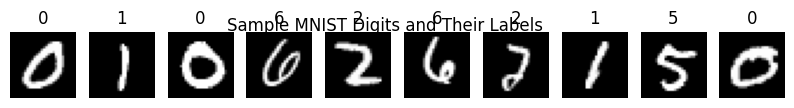

In [ ]:
# Function to visualize a batch of images
def visualize_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 1))

    for i in range(num_samples):
        # Choose a random index
        idx = np.random.randint(0, X.shape[0])

        # Select the image and label
        image = X[idx].reshape(28, 28)  # Reshape for plotting
        label = np.argmax(y[idx])       # Get the numeric label from one-hot encoded vector

        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(label)

    plt.suptitle("Sample MNIST Digits and Their Labels")
    plt.show()

# Visualize 10 random samples from the training set
visualize_samples(X_train, y_train, num_samples=10)


In [ ]:
def build_cnn_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 93s 95ms/step - accuracy: 0.7536 - loss: 0.7460 - val_accuracy: 0.9862 - val_loss: 0.0427
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.9688 - loss: 0.1011

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1011 - val_accuracy: 0.9857 - val_loss: 0.0439
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 133s 89ms/step - accuracy: 0.9626 - loss: 0.1273 - val_accuracy: 0.9893 - val_loss: 0.0333
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1008 - val_accuracy: 0.9896 - val_loss: 0.0329
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.9724 - loss: 0.0954 - val_accuracy: 0.9916 - val_loss: 0.0271
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.1677 - val_accuracy: 0.9921 - val_loss: 0.0263
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.9779 - loss: 0.0778 - val_accuracy: 0.9920 - val_loss: 0.0240
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0343 - val_accuracy: 0.9918 - val_loss: 0.0237
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 135s 88ms/step - accuracy: 0.9821 - loss: 0.0638 - val_accuracy: 0.

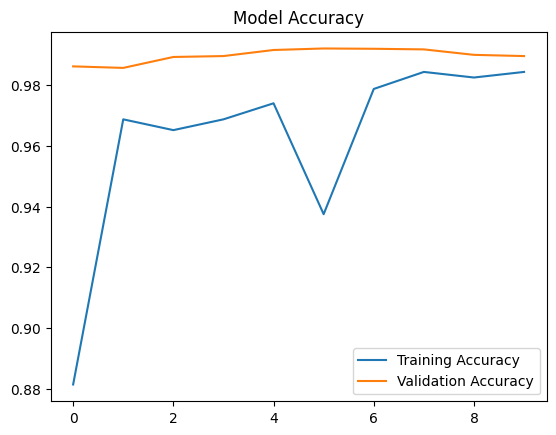

In [ ]:
# Data augmentation to improve generalization
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 64
)

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save("ocr_cnn_model.h5")

Test Accuracy: 0.99


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
ocr_model = load_model("ocr_cnn_model.h5")

# Load and preprocess a custom image
def preprocess_custom_image(image_path):
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# Predict
image_path = "test_image2.png"
custom_image = preprocess_custom_image(image_path)
prediction = ocr_model.predict(custom_image)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Label: 8


## Load recompile and predict

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
ocr_model = load_model("ocr_cnn_model.h5")

# Recompile the model (use the same optimizer and loss as during training)
ocr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_custom_image(image_path):
    # Load image in grayscale mode and resize to 28x28
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')

    # Convert image to numpy array and normalize
    img_array = img_to_array(img) / 255.0

    # Reshape to match model input
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# Example usage
custom_image = preprocess_custom_image("test_image3.png")


In [ ]:
# Predict on the custom image
prediction = ocr_model.predict(custom_image)

# Debugging: Print raw predictions
print("Raw Predictions:", prediction)

# Decode the prediction
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw Predictions: [[0.5113938  0.06351367 0.02072249 0.00763968 0.0258004  0.03625042
  0.15843876 0.00941476 0.13662072 0.03020526]]
Predicted Label: 0


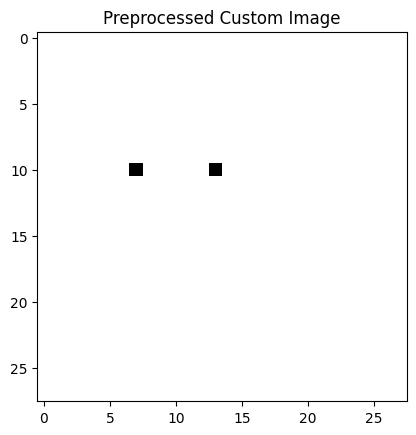

In [ ]:
import matplotlib.pyplot as plt

# Visualize the preprocessed image
plt.imshow(custom_image[0].reshape(28, 28), cmap='gray')
plt.title("Preprocessed Custom Image")
plt.show()


## new test data generation code

In [ ]:
def generate_image(char, font_path='arial.ttf', size=(28, 28)):
    # Create a blank image with a white background
    img = Image.new('L', size, color=255)  # 'L' mode for grayscale
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 20)  # Use the specified font with size 20

    # Calculate text bounding box for centering
    bbox = draw.textbbox((0, 0), char, font=font)  # Get bounding box (left, top, right, bottom)
    w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]  # Width and height from bbox

    # Draw text in the center of the image
    draw.text(((size[0] - w) / 2, (size[1] - h) / 2), char, fill=0, font=font)

    # Convert to numpy array
    return np.array(img)

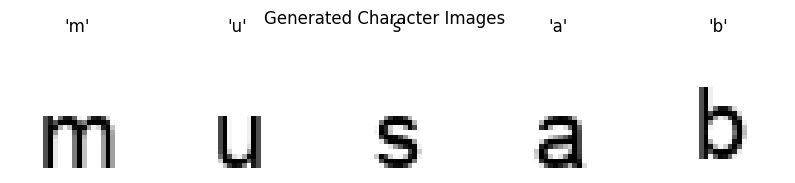

In [ ]:
def visualize_generated_characters(characters, font_path='arial.ttf'):
    plt.figure(figsize=(10, 2))

    for i, char in enumerate(characters):
        img_array = generate_image(char, font_path)

        # Plot the generated image
        plt.subplot(1, len(characters), i + 1)
        plt.imshow(img_array, cmap='gray')
        plt.axis('off')
        plt.title(f"'{char}'")

    plt.suptitle("Generated Character Images")
    plt.show()

# Example: Generate and visualize images of characters 0-9
characters = ['m','u','s','a','b']
visualize_generated_characters(characters)